## IMPORT LIBRARES AND PACKAGES

In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, cv2
import dlib

from PIL import Image
from scipy import stats
import random

from keras.utils import to_categorical

## [1] DATA PREPARATION

Setup data directory

In [2]:
IMAGE_DIRECTORY = "./data-1/cohn-kanade-images/"
DATA_LABEL_DIRECTORY = "./data-1/data_labels.csv"

#### Load Label Dataset

In [3]:
df = pd.read_csv(DATA_LABEL_DIRECTORY)

Explore head

In [4]:
df.head(5)

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
0,S005,1,11,./cohn-kanade-images/S005/001/S005_001_0000001...,S005_001_00000011,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,S010,1,14,./cohn-kanade-images/S010/001/S010_001_0000001...,S010_001_00000014,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
2,S010,2,14,./cohn-kanade-images/S010/002/S010_002_0000001...,S010_002_00000014,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,surprise
3,S010,3,18,./cohn-kanade-images/S010/003/S010_003_0000001...,S010_003_00000018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,S010,4,19,./cohn-kanade-images/S010/004/S010_004_0000001...,S010_004_00000019,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,negative


Explore Tail

In [5]:
df.tail(5)

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
555,S506,4,38,./cohn-kanade-images/S506/004/S506_004_0000003...,S506_004_00000038,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
556,S506,6,42,./cohn-kanade-images/S506/006/S506_006_0000004...,S506_006_00000042,1,1,1,0,0,...,0,0,0,0,0,1,0,0,1,negative
557,S895,2,7,./cohn-kanade-images/S895/002/S895_002_0000000...,S895_002_00000007,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,negative
558,S999,1,18,./cohn-kanade-images/S999/001/S999_001_0000001...,S999_001_00000018,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,negative
559,S999,3,55,./cohn-kanade-images/S999/003/S999_003_0000005...,S999_003_00000055,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,negative


#### 1.1 DATA INTEGRITY CHECKING

Check Duplicate

In [6]:
print('Number of duplicated rows:', df.duplicated().sum())

Number of duplicated rows: 0


Check Nan Value

In [7]:
print('Number of Nan value rows:\n', df.isnull().sum())

Number of Nan value rows:
 subject               0
sequence              0
image_index           0
filepath              0
file_prefix           0
AU17                  0
AU1                   0
AU2                   0
AU25                  0
AU27                  0
AU4                   0
AU7                   0
AU23                  0
AU24                  0
AU6                   0
AU12                  0
AU15                  0
AU14                  0
AU11                  0
AU26                  0
high_level_emotion    0
dtype: int64


Check Data Overall 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subject             560 non-null    object
 1   sequence            560 non-null    int64 
 2   image_index         560 non-null    int64 
 3   filepath            560 non-null    object
 4   file_prefix         560 non-null    object
 5   AU17                560 non-null    int64 
 6   AU1                 560 non-null    int64 
 7   AU2                 560 non-null    int64 
 8   AU25                560 non-null    int64 
 9   AU27                560 non-null    int64 
 10  AU4                 560 non-null    int64 
 11  AU7                 560 non-null    int64 
 12  AU23                560 non-null    int64 
 13  AU24                560 non-null    int64 
 14  AU6                 560 non-null    int64 
 15  AU12                560 non-null    int64 
 16  AU15                560 no

## [2] EXPLORATORY DATA ANALYSIS

2.1 Check Label Count

C:\Users\Pham Quoc Bao\AppData\Local\Temp\ipykernel_16784\2055809110.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=target_value_counts.index, y=target_value_counts.values, palette='hls',)


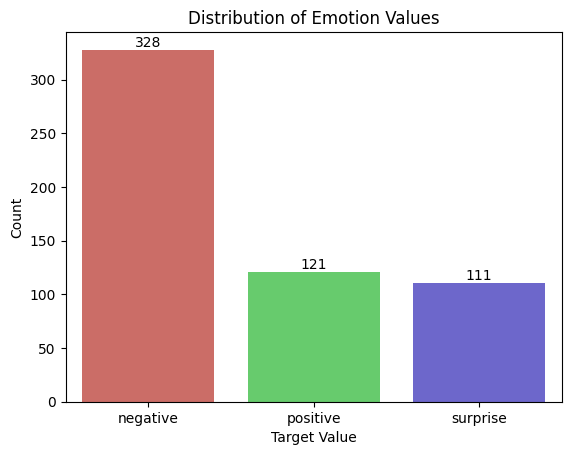

In [9]:
# Get the counts of each target value
target_value_counts = df['high_level_emotion'].value_counts()

# Create a bar plot
ax = sns.barplot(x=target_value_counts.index, y=target_value_counts.values, palette='hls',)

# Show the number of observations inside each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Emotion Values')
plt.show()

**Observation**

It seems there are unbalanced count of negative comparing to other label

2.2 Visual Inspectation

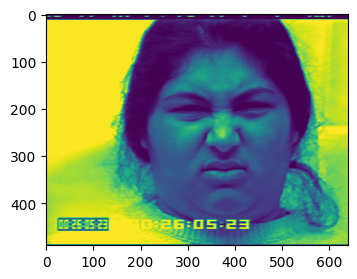

In [10]:
# For simplicity, let's just take the first subject and its first sequence
subject_sequence = df[(df['subject'] == 'S005') & (df['sequence'] == 1)]
sequence_files = subject_sequence['filepath'].tolist()

# Ensure that axes is always iterable
fig, axes = plt.subplots(1, len(sequence_files), figsize=(15, 3))
if len(sequence_files) == 1:
    axes = [axes]  # Make it a list so it's iterable

for ax, file in zip(axes, sequence_files):
    # Correct the file path by stripping the redundant part
    corrected_file_path = file.replace('./cohn-kanade-images/', '')
    img_path = os.path.join(IMAGE_DIRECTORY, corrected_file_path)
    try:
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('on')
    except IOError:
        print(f"Error opening image: {img_path}")

plt.show()

In [11]:
# Define an empty list to hold image sizes
image_sizes = []

# Define lists to hold mean and standard deviation of pixel values
mean_pixel_values = []
std_pixel_values = []

# Define a list to hold paths of corrupt images
corrupt_images = []

img_path_list = []
# Loop through the file paths in your DataFrame
for file_path in df['filepath']:
    corrected_file_path = file_path.replace('./cohn-kanade-images/', '')
    img_path = os.path.join(IMAGE_DIRECTORY, corrected_file_path)
    img_path_list.append(img_path)
    try:
        # Open the image and convert it to RGB (in case some are grayscale)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Check if the image is read correctly
        if img is not None:
            # Append the image size
            image_sizes.append(img.shape)
            
            # Calculate and store the mean and standard deviation of pixel values
            mean_pixel_values.append(np.mean(img))
            std_pixel_values.append(np.std(img))
        else:
            # If img is None, the image is corrupt
            corrupt_images.append(img_path)
            
    except Exception as e:
        # If an exception is raised, the image is likely corrupt
        corrupt_images.append(img_path)

In [12]:
# Now let's analyze the image sizes
image_sizes = np.array(image_sizes)
unique_sizes = np.unique(image_sizes, axis=0)

# We can print out or plot the unique sizes to decide on a common size
print(f"Unique image sizes: {unique_sizes}")

Unique image sizes: [[480 640   3]
 [480 720   3]
 [490 640   3]]


In [13]:
# Calculate the overall mean and standard deviation for the pixel values
overall_mean = np.mean(mean_pixel_values)
overall_std = np.std(std_pixel_values)

print(f"Overall mean pixel value: {overall_mean}")
print(f"Overall standard deviation of pixel values: {overall_std}")

# Print out corrupt images, if any
if corrupt_images:
    print("Found corrupt images:")
    for corrupt_img in corrupt_images:
        print(corrupt_img)
else:
    print("No corrupt images found.")

Overall mean pixel value: 99.93890188972647
Overall standard deviation of pixel values: 9.063075756547514
No corrupt images found.


In [14]:
# Background Consistency Check
background_modes = []

for img_path in img_path_list:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Grayscale simplifies the analysis
    border_pixels = np.concatenate([img[0, :], img[-1, :], img[:, 0], img[:, -1]])  # Extract border pixels
    mode = stats.mode(border_pixels)  # Find the mode of the border pixels
    background_modes.append(mode)

C:\Users\Pham Quoc Bao\AppData\Local\Temp\ipykernel_16784\3067096416.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(border_pixels)  # Find the mode of the border pixels


Mean mode value: 11.378571428571428
Standard deviation of mode values: 47.69470887951871


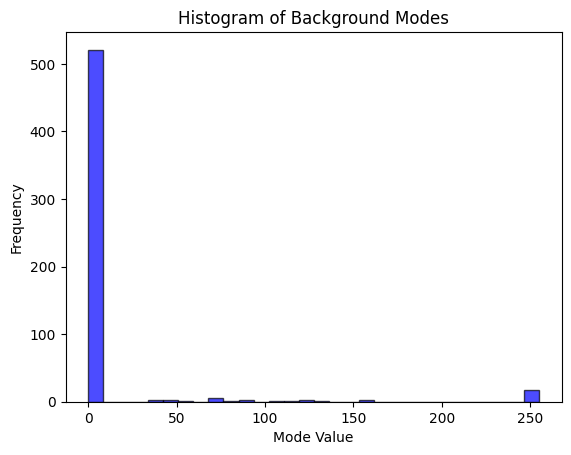

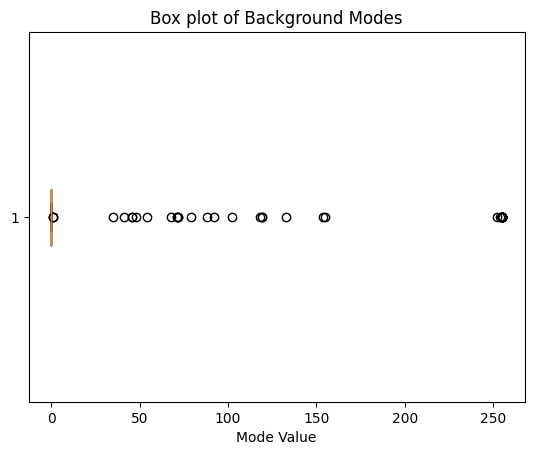

In [15]:

# Extract the mode values and counts
mode_values = [mode.mode[0] for mode in background_modes]
mode_counts = [mode.count[0] for mode in background_modes]

# Calculate basic statistics
mean_mode = np.mean(mode_values)
std_dev_mode = np.std(mode_values)

print(f"Mean mode value: {mean_mode}")
print(f"Standard deviation of mode values: {std_dev_mode}")

# Visualize the distribution of mode values
plt.hist(mode_values, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Background Modes')
plt.xlabel('Mode Value')
plt.ylabel('Frequency')
plt.show()

# Box plot for detecting outliers
plt.boxplot(mode_values, vert=False)
plt.title('Box plot of Background Modes')
plt.xlabel('Mode Value')
plt.show()

## [3] SETUP AND EXTRACT ESSENTIAL DATA 

#### 3.1 Load and Prepare Image Dataset

In [16]:
# Load the pre-trained facial landmark predictor
predictor_path = "./dlib-models-master/dlib-models-master/shape_predictor_68_face_landmarks.dat/shape_predictor_68_face_landmarks.dat"  
face_detector = dlib.get_frontal_face_detector()
landmark_predictor = dlib.shape_predictor(predictor_path)

In [17]:
def get_facial_landmarks(image):
    faces = face_detector(image, 1)
    for k, d in enumerate(faces):
        # Get the landmarks/parts for the face in box d.
        shape = landmark_predictor(image, d)
        landmarks = [(point.x, point.y) for point in shape.parts()]
        return landmarks  # For simplicity, returning landmarks of the first face detected
    return None

In [18]:
def place_on_black_background(cropped_face, bg_size=(48, 48)):
    # Create a black background
    background = np.zeros((bg_size[0], bg_size[1]), dtype=np.uint8)

    # Calculate the centering position
    x_offset = (bg_size[1] - cropped_face.shape[1]) // 2
    y_offset = (bg_size[0] - cropped_face.shape[0]) // 2

    # Place the cropped face in the center of the black background
    background[y_offset:y_offset+cropped_face.shape[0], x_offset:x_offset+cropped_face.shape[1]] = cropped_face
    return background

In [19]:
# Initialize an empty list to store processed images
full_face_images = []

# Get a list of image file paths from the 'filepath' column in the DataFrame
img_file_list = df['filepath'].tolist()

for img in img_file_list:
    corrected_file_path = img.replace('./cohn-kanade-images/', '')
    img_path = os.path.join(IMAGE_DIRECTORY, corrected_file_path)
    input_img = cv2.imread(img_path)
    grayscaled_image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Detect landmarks
    faces = face_detector(grayscaled_image, 1)
    for face in faces:
        shape = landmark_predictor(grayscaled_image, face)
        landmarks = [(point.x, point.y) for point in shape.parts()]

        # Crop the face area
        x_coordinates, y_coordinates = zip(*landmarks)
        x_min, x_max = min(x_coordinates), max(x_coordinates)
        y_min, y_max = min(y_coordinates), max(y_coordinates)
        cropped_face = grayscaled_image[y_min:y_max, x_min:x_max]

        # Resize the cropped face
        resized_face = cv2.resize(cropped_face, (43, 43))  # Resize to smaller than background

        # Place on black background
        face_on_black_bg = place_on_black_background(resized_face)
        
        # Normalize the image
        normalized_face = face_on_black_bg / 255.0
        full_face_images.append(np.expand_dims(normalized_face, axis=-1))

# Convert list to NumPy array
full_face_data = np.array(full_face_images).astype('float32')

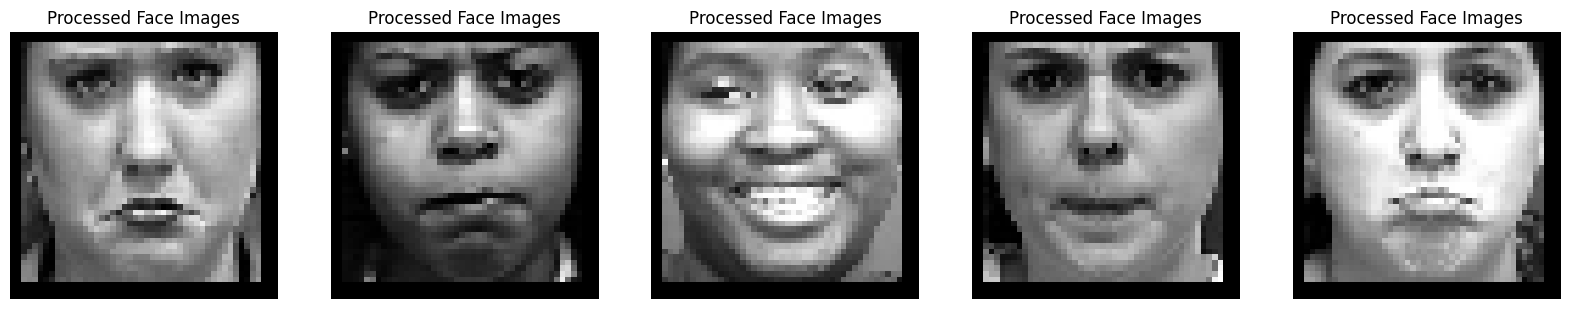

In [20]:
# Function to display random images
def display_random_images(images, title, num_images=5):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        idx = random.randint(0, len(images) - 1)
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[idx].reshape(48, 48), cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Display random images
display_random_images(full_face_data, "Processed Face Images")

#### 3.2 Load and Prepare Label

In [21]:
# Define mapping conversion
target_mapping = {'negative': 0, 'positive': 1, 'surprise': 2}
df['high_level_emotion_num'] = df['high_level_emotion'].map(target_mapping)
labels = df['high_level_emotion_num'].to_list()
num_classes = 3
emotions_label = to_categorical(labels, num_classes=num_classes)

#### 3.3 Load and Prepare FACS CODE

In [22]:
facs_code_list = []
facs_code_df = df[df.columns[5:20]]
for i in range(df.shape[0]):
    facs_code_row = df.iloc[i, 5:20].tolist()
    facs_code_list.append(facs_code_row)
facs_list = np.array(facs_code_list)
facs_code_df

,AU17,AU1,AU2,AU25,AU27,AU4,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0
556,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1
557,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
558,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0


## [4] TRAIN TEST SPLIT

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

MIGHT RESAMPLE

SPLIT TRAIN, VAL, TEST SET

In [24]:
# Split data into training, validation, and test sets
# Split data into training, validation, and test sets for both full-face and AU-specific images
# X_train_full, X_temp_full, X_train_au, X_temp_au, y_train_facs, y_temp_facs, y_train_emotion, y_temp_emotion = train_test_split(full_face_data, au_specific_data, facs_list, emotions_label, test_size=0.3)

# X_val_full, X_test_full, X_val_au, X_test_au, y_val_facs, y_test_facs, y_val_emotion, y_test_emotion = train_test_split(X_temp_full, X_temp_au, y_temp_facs, y_temp_emotion, test_size=0.5)
# First, split the data into training + temporary sets (combining validation and test sets for now)

X_train_full, X_temp_full, y_train_facs, y_temp_facs, y_train_emotion, y_temp_emotion = train_test_split(
    full_face_data,
    facs_list,
    emotions_label,
    test_size=0.3,
    random_state=42,  # Use a random state for reproducibility
    stratify=emotions_label  # This is optional, to keep the same distribution of emotions (if classification is balanced)
)

# Then split the temporary set into validation and test sets
X_val_full, X_test_full, y_val_facs, y_test_facs, y_val_emotion, y_test_emotion = train_test_split(
    X_temp_full,
    y_temp_facs,
    y_temp_emotion,
    test_size=0.5,  # This will split the temporary set into two equal parts
    random_state=42,  # Use the same random state for reproducibility
    stratify=y_temp_emotion  # This is optional, as above
)
# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# # Preprocess images for VGG16
# X_rgb = np.repeat(X[..., np.newaxis], 3, -1)  # Convert grayscale to RGB
# X_preprocessed = preprocess_input(X_rgb)

# # Convert labels to categorical
# y_facs_categorical = to_categorical(y_facs)
# y_emotion_categorical = to_categorical(y_emotion)

# # Split the data
# X_train, X_val, y_train_facs, y_val_facs, y_train_emotion, y_val_emotion = train_test_split(
#     X_preprocessed, y_facs_categorical, y_emotion_categorical, test_size=0.2, random_state=42
# )

In [25]:
# TRAIN (70% of the dataset)
print("Train")
# print("Full Face Images:", len(X_train_full), "AU Specific Images:", len(X_train_au))
# print("FACS Labels:", len(y_train_facs), "Emotion Labels:", len(y_train_emotion), "\n")

# # VAL (15% of the dataset)
# print("Validation")
# print("Full Face Images:", len(X_val_full), "AU Specific Images:", len(X_val_au))
# print("FACS Labels:", len(y_val_facs), "Emotion Labels:", len(y_val_emotion), "\n")

# # TEST (15% of the dataset)
# print("Test")
# print("Full Face Images:", len(X_test_full), "AU Specific Images:", len(X_test_au))
# print("FACS Labels:", len(y_test_facs), "Emotion Labels:", len(y_test_emotion))


print("Training set:", X_train_full.shape, y_train_facs.shape, y_train_emotion.shape)
print("Validation set:", X_val_full.shape, y_val_facs.shape, y_val_emotion.shape)
print("Testing set:", X_test_full.shape, y_test_facs.shape, y_test_emotion.shape)

Train
Training set: (392, 48, 48, 1) (392, 15) (392, 3)
Validation set: (84, 48, 48, 1) (84, 15) (84, 3)
Testing set: (84, 48, 48, 1) (84, 15) (84, 3)


DATA AUGMENTATION

In [26]:
# Initialize the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

# Custom generator
def custom_generator(X_train, y_facs_code, y_emotion_label, batch_size=64):
    gen = data_gen.flow(X_train, batch_size=batch_size, shuffle=False)
    while True:
        X_batch = next(gen)
        idx = (gen.batch_index - 1) * batch_size
        idx = idx if idx < X_train.shape[0] else X_train.shape[0] - batch_size
        y_batch_facs = y_facs_code[idx: idx + batch_size]
        y_batch_emotion = y_emotion_label[idx: idx + batch_size]
        yield X_batch, {'facs_output': y_batch_facs, 'emotion_output': y_batch_emotion}

train_generator = custom_generator(X_train_full, y_train_facs, y_train_emotion)

## [5] GET BASELINE MODEL

In [27]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.optimizers.schedules import ExponentialDecay
from keras.optimizers import Adam

5.1 Design Model Structure

In [32]:
def FER_Model(input_shape=(48,48,1)):
    # first input model
    visible = Input(shape=input_shape, name='input')
    num_classes = 3
    num_aus = 15
    #the 1-st block
    x = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_1')(visible)
    x = BatchNormalization()(x)
    x = Conv2D(64, kernel_size=3, activation='relu', padding='same', name = 'conv1_2')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2), name = 'pool1_1')(x)
    x = Dropout(0.3, name = 'drop1_1')(x)#the 2-nd block
    x = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_1')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_2')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=3, activation='relu', padding='same', name = 'conv2_3')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2), name = 'pool2_1')(x)
    x = Dropout(0.3, name = 'drop2_1')(x)#the 3-rd block
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_1')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_2')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_3')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv3_4')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2), name = 'pool3_1')(x)
    x = Dropout(0.3, name = 'drop3_1')(x)#the 4-th block
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_1')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_2')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_3')(x)
    x = BatchNormalization()(x)
    x = Conv2D(256, kernel_size=3, activation='relu', padding='same', name = 'conv4_4')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2), name = 'pool4_1')(x)
    x = Dropout(0.3, name = 'drop4_1')(x)
    
    #the 5-th block
    x = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_1')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_2')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_3')(x)
    x = BatchNormalization()(x)
    x = Conv2D(512, kernel_size=3, activation='relu', padding='same', name = 'conv5_4')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2), name = 'pool5_1')(x)
    x = Dropout(0.3, name = 'drop5_1')(x)#Flatten and output
    
    # Flatten before passing to the dense layers
    x = Flatten()(x)

    # Common dense layer for feature extraction
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    # AU classification branch
    au_branch = Dense(256, activation='relu')(x)
    au_branch = Dropout(0.5)(au_branch)
    au_output = Dense(num_aus, activation='sigmoid', name='au_output')(au_branch)

    # Emotion classification branch
    emotion_branch = Dense(256, activation='relu')(x)
    emotion_branch = Dropout(0.5)(emotion_branch)
    emotion_output = Dense(num_classes, activation='softmax', name='emotion_output')(x)

    # Creating the model
    # model = Model(inputs=visible, outputs=[au_output, emotion_output])
    model = Model(inputs=visible, outputs=[emotion_output,au_output])
    
    return model

In [33]:
# input_layer = Input(shape=(48, 48, 1))  # INPUT WILL BE IMAGE WITH DESIGNED DIMENSIONS

# # Shared Convolutional Layers
# x = Conv2D(32, (3, 3), activation='relu')(input_layer)
# x = Conv2D(64, (3, 3), activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(128, (3, 3), activation='relu')(x)
# x = Conv2D(256, (3, 3), activation='relu')(x)  # New Conv layer
# x = MaxPooling2D((2, 2))(x)


# # Adding batch normalization and dropout for regularization
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)

# # FACS Branch
# facs_branch = Conv2D(256, (3, 3), activation='relu')(x)  # Additional Conv layer for FACS
# # Removed MaxPooling to avoid dimensionality reduction
# facs_branch = Flatten()(facs_branch)
# facs_branch = Dense(128, activation='relu')(facs_branch)
# facs_branch = Dropout(0.5)(facs_branch)
# facs_output = Dense(15, activation='sigmoid', name='facs_output')(facs_branch)

# # Emotion Branch (continuing from shared layers)
# emotion_branch = Flatten()(x)
# emotion_branch = Dense(64, activation='relu')(emotion_branch)
# emotion_branch = Dropout(0.5)(emotion_branch)
# emotion_output = Dense(3, activation='softmax', name='emotion_output')(emotion_branch)

# # Create the model
# model = Model(inputs=input_layer, outputs=[facs_output, emotion_output])

# model.compile(optimizer='adam', 
#               loss={'facs_output': 'binary_crossentropy', 'emotion_output': 'categorical_crossentropy'}, 
#               metrics=['accuracy'])

In [34]:
# Create the model instance
model = FER_Model(input_shape=(48, 48, 1))

# # Compile the model
# model.compile(optimizer='adam',
#               loss={'au_output': 'binary_crossentropy', 'emotion_output': 'categorical_crossentropy'},
#               metrics={'au_output': 'accuracy', 'emotion_output': 'accuracy'})

# Define the initial learning rate
initial_learning_rate = 0.0001

# Define the decay steps and rate
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Create an instance of the Adam optimizer with the learning rate schedule
opt = Adam(learning_rate=lr_schedule)

# Compile the model
model.compile(optimizer=opt,
              loss={'emotion_output': 'categorical_crossentropy', 'au_output': 'binary_crossentropy'},
              metrics={'emotion_output': 'accuracy', 'au_output': 'accuracy'})

# Print the model summary
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 conv1_1 (Conv2D)            (None, 48, 48, 64)           640       ['input[0][0]']               
                                                                                                  
 batch_normalization_17 (Ba  (None, 48, 48, 64)           256       ['conv1_1[0][0]']             
 tchNormalization)                                                                                
                                                                                                  
 conv1_2 (Conv2D)            (None, 48, 48, 64)           36928     ['batch_normalization_17

In [35]:
# # Assuming 'model' is already defined as per your previous code

# # Change in training configuration
epochs = 100
batch_size = 64

# Training the model with the updated configuration
# history = model.fit(X_train, {'facs_output': y_train_facs, 'emotion_output': y_train_emotion}, 
#                     validation_data=(X_val, {'facs_output': y_val_facs, 'emotion_output': y_val_emotion}), 
#                     epochs=epochs, batch_size=batch_size)


# print("Training set:", X_train_full.shape, y_train_facs.shape, y_train_emotion.shape)
# print("Validation set:", X_val_full.shape, y_val_facs.shape, y_val_emotion.shape)
# print("Testing set:", X_test_full.shape, y_test_facs.shape, y_test_emotion.shape)

# Correct the names in the model.fit call
history = model.fit(
    x=X_train_full, 
    y={'emotion_output': y_train_emotion, 'au_output': y_train_facs},
    steps_per_epoch=len(X_train_full) / batch_size, # <---- Re-validate this
    validation_data=(X_val_full, {'emotion_output': y_val_emotion, 'au_output': y_val_facs}),
    epochs=epochs,
    batch_size=batch_size
)


Epoch 1/100
7/7 [==============================] - 28s 3s/step - loss: 3.2790 - emotion_output_loss: 2.0478 - au_output_loss: 1.2312 - emotion_output_accuracy: 0.4719 - au_output_accuracy: 0.1199 - val_loss: 1.7793 - val_emotion_output_loss: 1.0891 - val_au_output_loss: 0.6901 - val_emotion_output_accuracy: 0.5952 - val_au_output_accuracy: 0.2500
Epoch 2/100
7/7 [==============================] - 21s 3s/step - loss: 3.1563 - emotion_output_loss: 2.1445 - au_output_loss: 1.0118 - emotion_output_accuracy: 0.4592 - au_output_accuracy: 0.1250 - val_loss: 1.7631 - val_emotion_output_loss: 1.0776 - val_au_output_loss: 0.6856 - val_emotion_output_accuracy: 0.5952 - val_au_output_accuracy: 0.2500
Epoch 3/100
7/7 [==============================] - 21s 3s/step - loss: 2.5884 - emotion_output_loss: 1.6929 - au_output_loss: 0.8955 - emotion_output_accuracy: 0.4668 - au_output_accuracy: 0.1276 - val_loss: 1.7484 - val_emotion_output_loss: 1.0680 - val_au_output_loss: 0.6804 - val_emotion_output_acc

In [36]:
# Evaluate the model on the test set
evaluation = model.evaluate(
    X_test_full, 
    {'au_output': y_test_facs, 'emotion_output': y_test_emotion}
)

# Unpacking the evaluation results
total_loss = evaluation[0] # Total loss
loss_au = evaluation[1] # Loss for AU output
loss_emotion = evaluation[2] # Loss for emotion output
accuracy_au = evaluation[3] # Accuracy for AU output
accuracy_emotion = evaluation[4] # Accuracy for emotion output

# Print evaluation results
print(f"Total Loss: {total_loss}")
print(f"Loss for AU Output: {loss_au}")
print(f"Loss for Emotion Output: {loss_emotion}")
print(f"Accuracy for AU Output: {accuracy_au}")
print(f"Accuracy for Emotion Output: {accuracy_emotion}")

3/3 [==============================] - 1s 283ms/step - loss: 1.3823 - emotion_output_loss: 0.9509 - au_output_loss: 0.4313 - emotion_output_accuracy: 0.6905 - au_output_accuracy: 0.3214
Total Loss: 1.3822604417800903
Loss for AU Output: 0.9509317278862
Loss for Emotion Output: 0.4313286244869232
Accuracy for AU Output: 0.6904761791229248
Accuracy for Emotion Output: 0.3214285671710968


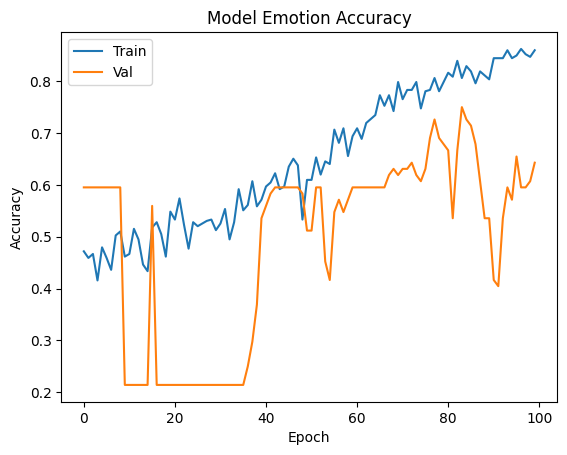

<function matplotlib.pyplot.show(close=None, block=None)>

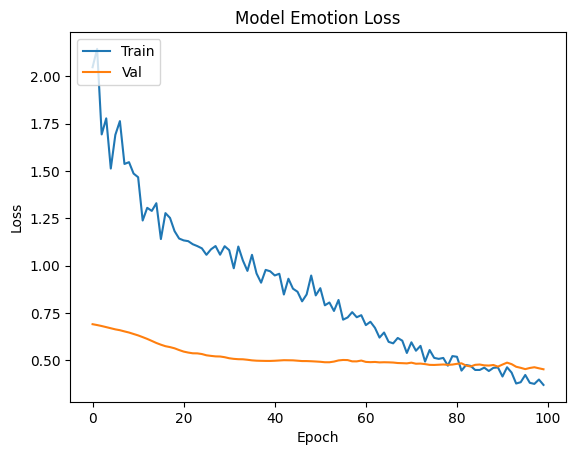

In [37]:
# Plotting the training and validation accuracy
plt.plot(history.history['emotion_output_accuracy'])
plt.plot(history.history['val_emotion_output_accuracy'])
plt.title('Model Emotion Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plotting the training and validation loss for AU output
plt.plot(history.history['emotion_output_loss'])
plt.plot(history.history['val_au_output_loss'])
plt.title('Model Emotion Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show


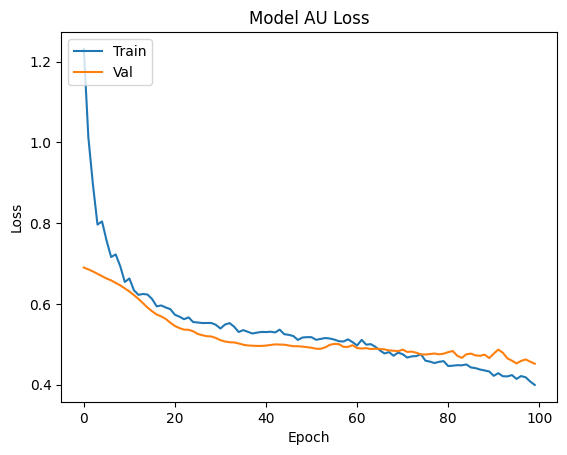

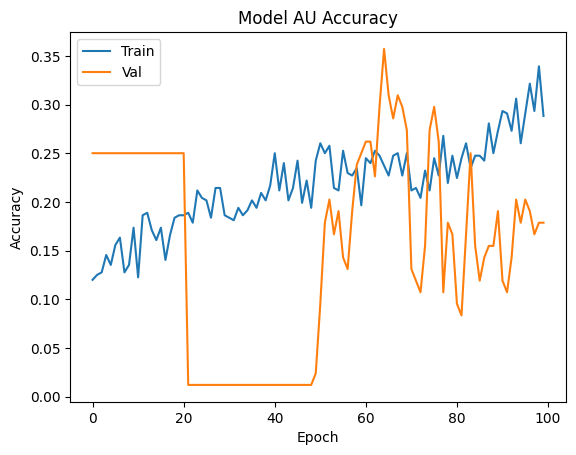

In [38]:
# Plotting the training and validation loss for AU output
plt.plot(history.history['au_output_loss'])
plt.plot(history.history['val_au_output_loss'])
plt.title('Model AU Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plotting the training and validation accuracy for AU output
plt.plot(history.history['au_output_accuracy'])
plt.plot(history.history['val_au_output_accuracy'])
plt.title('Model AU Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [39]:
predictions = model.predict(X_test_full)

3/3 [==============================] - 1s 290ms/step


In [40]:
facs_predictions, emotion_predictions = predictions
# Processing FACS predictions: Convert probabilities to binary values
facs_pred_binary = (facs_predictions > 0.5).astype(int)

# Processing Emotion predictions: Convert probabilities to class labels
emotion_pred_labels = np.argmax(emotion_predictions, axis=1)

In [41]:
facs_pred_binary

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1,

In [42]:
emotion_pred_labels

array([ 0,  0, 10,  0, 10, 10, 10, 10, 10,  0,  0,  0, 10, 10, 10, 10,  0,
        0, 10,  0, 10, 10,  0,  0,  0, 10, 10,  0, 10,  0, 10, 10,  0,  3,
        0, 10,  0, 10,  0, 10, 10, 10,  0, 10,  0, 10,  0,  0, 10,  3, 10,
        0,  0, 10, 10,  0, 10, 10,  0,  0, 10, 10, 10, 10, 10, 10,  0,  0,
        0,  0,  3,  0,  1,  0,  0, 10, 10, 10,  0,  3,  0,  0,  0, 10],
      dtype=int64)

## [6] HYPER TUNING

In [ ]:
names = ['negative','positive','surprise']

def getLabel(id):
    return ['negative','positive','surprise'][id]

In [ ]:
# Tune note
    # Optimizer (Learning Rate, etc...)
    # Image Augumentation
    # Adjust Epoch
